In [1]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go



# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix

# pipeline
from sklearn.pipeline import Pipeline

In [2]:
intervals = {'15m':'60d','1h':'8mo','1d':'12mo'}

In [3]:
dfs = []
for inter in intervals:
    dfs.append(yf.download(tickers='ETH-USD', period = intervals[inter], interval = inter))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
variations = [2,4,6,8]

for df in dfs:
    for var in variations:
        df['var_'+str(var)] = df['High']/df.shift(-var)['Open']-1
        


In [5]:
dfs[1]

,Open,High,Low,Close,Adj Close,Volume,var_2,var_4,var_6,var_8
2021-01-19 07:00:00+00:00,1333.034546,1370.952637,1326.290894,1370.952637,1370.952637,0,-0.002809,-0.008539,-0.012680,-0.026712
2021-01-19 08:00:00+00:00,1371.241577,1384.956665,1368.498657,1374.707642,1374.707642,1678917632,0.002348,-0.030851,-0.022739,-0.018607
2021-01-19 09:00:00+00:00,1374.813965,1393.521606,1373.466797,1381.729980,1381.729980,936374272,0.007783,0.003574,-0.010689,-0.021899
2021-01-19 10:00:00+00:00,1381.712402,1391.768188,1369.256104,1382.569824,1382.569824,806682624,-0.026085,-0.017933,-0.013780,-0.017343
2021-01-19 11:00:00+00:00,1382.759888,1428.938599,1382.759888,1428.938599,1428.938599,2517630976,0.029080,0.014455,0.002960,0.043603
...,...,...,...,...,...,...,...,...,...,...
2021-09-19 04:00:00+01:00,3421.201172,3425.453857,3406.264893,3413.086670,3413.086670,107606016,0.003671,0.000290,NaN,NaN
2021-09-19 05:00:00+01:00,3411.707764,3432.415283,3401.060547,3409.329834,3409.329834,123011072,0.001838,NaN,NaN,NaN
2021-09-19 06:00:00+01:00,3412.923340,3427.196533,3408.376221,3424.241211,3424.241211,74695680,0.000799,NaN,NaN,NaN
2021-09-19 07:00:00+01:00,3426.118408,3429.235840,3415.951172,3423.494873,3423.494873,29252608,NaN,NaN,NaN,NaN


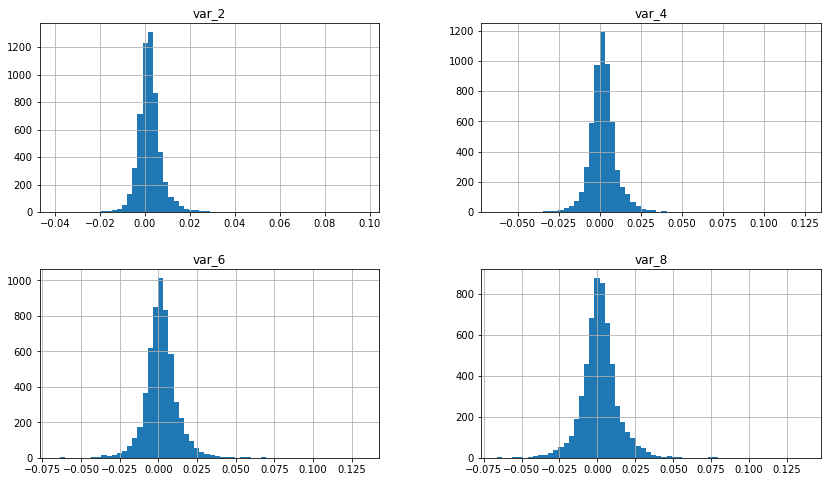

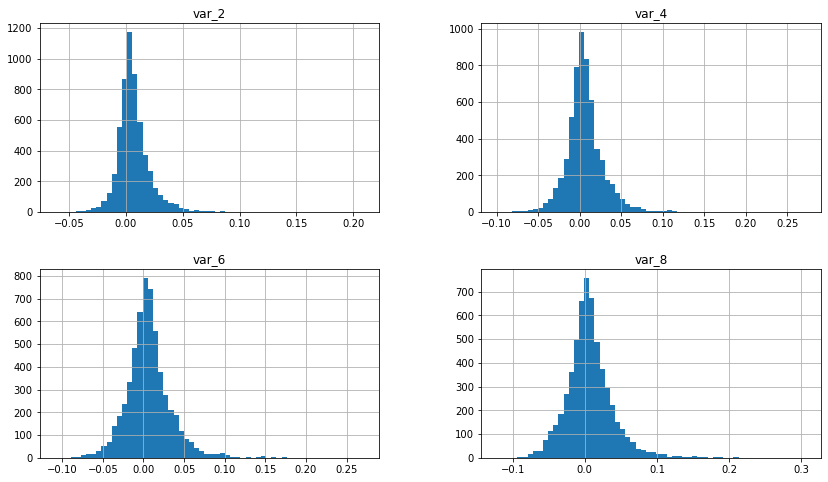

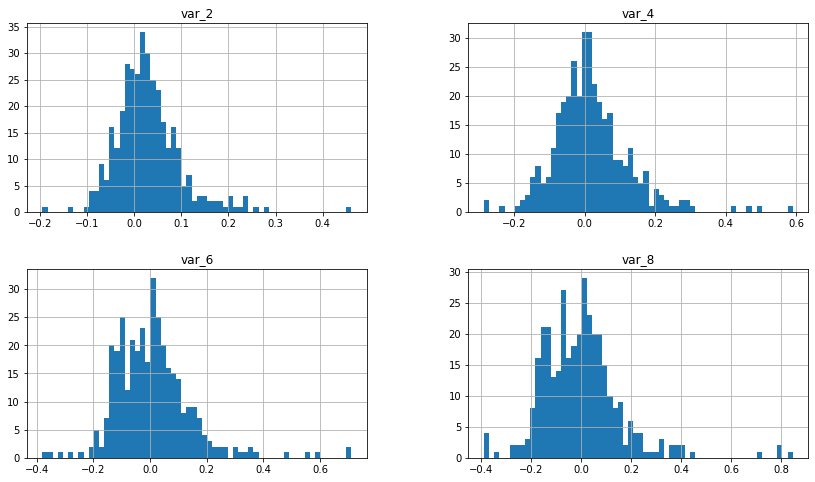

In [6]:
for df in dfs:
    df[['var_'+str(var) for var in variations]].hist(bins = 60,figsize = (14,8))

In [10]:
data = dfs[1]
# data['target'] = data['var_6'] >= 0.015
data['isHigher'] = (data['var_6'] >= 0.015) | (data['var_4'] >= 0.015)
data['isHigher'].mean()

0.36858369098712446

In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,var_2,var_4,var_6,var_8,target,isHigher
2021-09-19 04:00:00+01:00,3421.201172,3425.453857,3406.264893,3413.086670,3413.086670,107606016,0.003671,0.00029,NaN,NaN,False,False
2021-09-19 05:00:00+01:00,3411.707764,3432.415283,3401.060547,3409.329834,3409.329834,123011072,0.001838,NaN,NaN,NaN,False,False
2021-09-19 06:00:00+01:00,3412.923340,3427.196533,3408.376221,3424.241211,3424.241211,74695680,0.000799,NaN,NaN,NaN,False,False
2021-09-19 07:00:00+01:00,3426.118408,3429.235840,3415.951172,3423.494873,3423.494873,29252608,NaN,NaN,NaN,NaN,False,False
2021-09-19 07:50:02+01:00,3424.460938,3424.460938,3424.460938,3424.460938,3424.460938,0,NaN,NaN,NaN,NaN,False,False


In [12]:
data = data[['Open','High','Low','Close','Volume','isHigher']]

In [13]:
data.to_csv("train.csv",index=False)

In [17]:
data.iloc[-10:].to_csv("test.csv",index=False)

In [23]:
set() <= set([0,1])

True

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('isHigher', axis=1),  # predictors
    data['isHigher'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((4660, 5), (1165, 5))

In [26]:
print(y_train.mean())
print(y_test.mean())

0.36630901287553647
0.3776824034334764


In [27]:
# set up the pipeline
trade_pipe = Pipeline([

    # scale
    ('scaler', StandardScaler()),

    ('Logit', LogisticRegression(C=0.0005,class_weight='balanced', random_state=0)),
])

In [28]:
trade_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logit',
                 LogisticRegression(C=0.0005, class_weight='balanced',
                                    random_state=0))])

In [29]:
# make predictions for train set
class_ = trade_pipe.predict(X_train)
pred = trade_pipe.predict_proba(X_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print(confusion_matrix(y_train,class_))
print()

# make predictions for test set
class_ = trade_pipe.predict(X_test)
pred = trade_pipe.predict_proba(X_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print(confusion_matrix(y_test,class_))
print()

train roc-auc: 0.5158831853301806
train accuracy: 0.5405579399141631
[[1729 1224]
 [ 917  790]]

test roc-auc: 0.5033949843260188
test accuracy: 0.5201716738197425
[[414 311]
 [248 192]]



In [40]:
class_[0].dtype

dtype('bool')

In [7]:

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Bitcoin live share price evolution',
    yaxis_title='Bitcoin Price (kUS Dollars)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=6, label="6h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed


In [4]:
yf.download()

TypeError: download() missing 1 required positional argument: 'tickers'